In [1]:
## importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## some presets
pd.options.display.max_columns= 50

In [3]:
## getting training and test data
train = pd.read_csv("../../data/train.csv")
test = pd.read_csv("../../data/test.csv")
var_desc = pd.read_csv("../../data/variabledescription.csv")

##### Performing EDA

In [4]:
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,200.0,2.0,NaN,NaN,NaN,NaN,2,Urea,NaN,20.0,Broadcasting,Urea,15.0,18.0,NaN,NaN,Broadcasting,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,125.0,3.0,NaN,NaN,NaN,NaN,2,DAP Urea,15.0,10.0,Broadcasting,Urea,20.0,39.0,NaN,NaN,Broadcasting,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.0,Boring,Electric,80.0,2.0,Ganaura FYM,1.0,1.0,SoilApplied,2,DAP,4.0,NaN,SoilApplied,Urea,5.0,65.0,NaN,NaN,RootApplication,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,NaN,NaN,NaN,NaN,NaN,Ganaura,1.0,NaN,SoilApplied,2,DAP Urea,6.0,3.0,Broadcasting,Urea,5.0,5.0,NaN,NaN,Broadcasting,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.0,Boring,Electric,300.0,2.0,NaN,NaN,NaN,NaN,2,Urea DAP,15.0,30.0,Broadcasting,Urea,30.0,26.0,NaN,NaN,Broadcasting,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [5]:
var_desc

,Variable,Description
0,District,Name of the district
1,Block,Name of the block
2,CultLand,Area of total cultivated land
3,CropCultLand,Area of land under cultivation
4,LandPreparationMethod,Method for land preparation
5,CropTillageDate,Date of tillage of the largest plot
6,CropTillageDepth,Depth of the tillage
7,CropEstMethod,Method of transplantation
8,RcNursEstDate,Date of nursery establishment
9,SeedingSowingTransplanting,Date of sowing/Transplanting the crop


<div style="background-color: blue; padding: 0.1rem;"></div>

Checking the relationship between `Cultland` and `CropCultLand`

In [6]:
(train["CultLand"]-train["CropCultLand"]).min()

0

`CropCultLand` is likely amount of `CultLand` used for cultivation

<div style="background-color: blue; padding: 0.1rem;"></div>

<div style="background-color: red; padding: 0.1rem;"></div>
Inspecting Land Preparation Method

In [7]:
train.LandPreparationMethod.value_counts().sort_index()

LandPreparationMethod
BullockPlough                                                               1
BullockPlough FourWheelTracRotavator TractorPlough WetTillagePuddling       7
BullockPlough TractorPlough                                                 8
BullockPlough TractorPlough WetTillagePuddling                              3
BullockPlough TractorPlough WetTillagePuddling FourWheelTracRotavator       2
BullockPlough WetTillagePuddling                                            1
FourWheelTracRotavator                                                     71
FourWheelTracRotavator BullockPlough                                        1
FourWheelTracRotavator BullockPlough WetTillagePuddling TractorPlough       1
FourWheelTracRotavator TractorPlough                                       93
FourWheelTracRotavator TractorPlough WetTillagePuddling                    22
FourWheelTracRotavator WetTillagePuddling                                   2
FourWheelTracRotavator WetTillagePuddling 

It appears that some farms implement more than one land preparation method
<div style="background-color: red; padding: 0.1rem;"></div>

<div style="background-color: blue; padding: 0.1rem;"></div>

Inspecting **CropEstMethod** : Method of transplanting

In [8]:
train["CropEstMethod"].value_counts()

CropEstMethod
Manual_PuddledRandom      3346
Manual_PuddledLine         235
LineSowingAfterTillage     206
Broadcasting                83
Name: count, dtype: int64

`Manual_PuddleRandom` is most common method


<div style="background-color: blue; padding: 0.1rem;"></div>

##### Ideas for new features
- **NB:** there are two columns name `MineralFertAppMethod` but with 2 different meanings
- `Area of land not under cultivation` = `CultLand` - `CropCultLand` ✔️
- Separate `LandPreparationMethod` into individual columns ✔️
- `CropTillageYear`: Year of tillage of largest plot. Gotten from `CropTillageDate`❌  (all did in same year)
- `CropTillageDepth_per_CropCultLand`✔️
- `CropTillageDepth_per_CultLand`✔️
- `Year of Nursery_Establishment` from `RcNursEstDate` ❌ (all did in same year)
- `Num days from nursey to transplanting` from (`SeedingSowingTransplanting` - `RcNursEstDate`) ✔️
- `TillageToNursEst` = `RcNursEstDate` - `CropTillageDate`✔️
- Crops with no `RcNursEstDate` might have been planted directly without transplanting hence fill `Num days from nursey to transplanting` with 0 ✔️
- Separate `NursDetFactor` into individual columns ✔️
- Separate `TransDetFactor` into individual columns ✔️
- No `TransplantingIrrigationPowerSource` probably means no power source ✔️
- Separate `OrgFertilizers` into individual columns ✔️
- Ratio of `Ganaura` to `CropOrgFYM`❌ (dropped involved column)
- Those with missing `CropOrgFYM` probably used different type of `OrgFertilizers` than `FYM`✔️
- Separate `CropbasalFerts` into individual columns ✔️
- Separate `FirstTopDressFert` into individual columns ✔️
- `Num of items per instance` for columns that are separated into their individual columns (`LandPreparationMethod`, `NursDetFactor`, `TransDetFactor`, `OrgFertilizers`, `CropbasalFerts`, `FirstTopDressFert`) ✔️
- `TotalUrea` = `BasalUrea` + `1dtUrea` + `2dtUrea`✔️
- `AvgWaitBeforeUreaApplication` = (`1appDaysUrea`+`2appDaysUrea`)/2 ✔️
- `Nursery establishment to harvest days` = `Harv_date` - `RcNursDate`✔️
- `HarvestToThreshTime` = `Harv_date` - `Threshing_date`
- Check for other combinations of dates ❗
- `ResiduePerAcrea` = `Residue_length`/`Acre` ✔️
- `Harvest_perc` = 100 - `Residue_perc`✔️
- Check cols with high correlation with `Yield`, make scatterplots and remove outliers
- Remove `ID` column
- ***NB*** `Harvest_perc` sounds like it might have a close relation with target(`Yield`)

<br>
<br>
Observed:
- All farmers use chemical fertilizers

In [9]:
train["Threshing_method"].value_counts(dropna=False)
# train["NoFertilizerAppln"].isna().sum()

Threshing_method
machine    2098
hand       1772
Name: count, dtype: int64

In [10]:
import re
for col in train.columns:
    if re.search("date", col, flags=re.IGNORECASE):
        print(col)

CropTillageDate
RcNursEstDate
Harv_date
Threshing_date


##### Taking a look an null values

In [11]:
train.isna().sum()

ID                                       0
District                                 0
Block                                    0
CultLand                                 0
CropCultLand                             0
LandPreparationMethod                    0
CropTillageDate                          0
CropTillageDepth                         0
CropEstMethod                            0
RcNursEstDate                           83
SeedingSowingTransplanting               0
SeedlingsPerPit                        289
NursDetFactor                          289
TransDetFactor                         289
TransplantingIrrigationHours           193
TransplantingIrrigationSource          115
TransplantingIrrigationPowerSource     503
TransIrriCost                          882
StandingWater                          238
OrgFertilizers                        1335
Ganaura                               2417
CropOrgFYM                            2674
PCropSolidOrgFertAppMethod            1337
NoFertilize

In [12]:
train[train["RcNursEstDate"].isna()]["NursDetFactor"].isna().sum()

83

In [13]:
pd.to_datetime(train["RcNursEstDate"]).dt.month.value_counts()

RcNursEstDate
6.0    2433
7.0    1354
Name: count, dtype: int64

In [14]:
pd.to_datetime(train["SeedingSowingTransplanting"][train["RcNursEstDate"].isna()]).dt.month.value_counts()

SeedingSowingTransplanting
7    82
8     1
Name: count, dtype: int64

In [15]:
train[train["NursDetFactor"].isna()]["RcNursEstDate"]

7              NaN
15             NaN
69      2022-06-23
115     2022-07-02
120     2022-06-15
           ...    
3806    2022-07-02
3824    2022-06-29
3842           NaN
3849    2022-06-28
3865    2022-06-29
Name: RcNursEstDate, Length: 289, dtype: object

In [16]:
train[train["OrgFertilizers"].isna()]["CropOrgFYM"].isna().sum()

1335

In [17]:
# train["OrgFertilizers"].value_counts()
# train[train["OrgFertilizers"] == "FYM"]["CropOrgFYM"].isna().sum()
train[train["PCropSolidOrgFertAppMethod"].isna()]["OrgFertilizers"].isna().sum()

1335

In [18]:
train["TransplantingIrrigationSource"].value_counts()

TransplantingIrrigationSource
Boring      3228
Canal        373
Rainfed      103
Pond          36
TubeWell      12
Well           3
Name: count, dtype: int64

In [19]:
train["CropbasalFerts"].value_counts()

CropbasalFerts
DAP Urea             1640
DAP                  1379
Urea                  308
Urea DAP              134
DAP Other              70
DAP Urea SSP           51
NPK                    29
DAP Urea NPKS          18
NPK Urea                8
Urea DAP SSP            7
Urea NPKS               6
Urea DAP NPKS           3
DAP SSP                 3
DAP NPKS                3
Urea NPKS DAP           3
DAP NPK Urea            2
NPKS                    1
DAP NPKS Urea SSP       1
Urea DAP MoP            1
DAP Urea NPK            1
SSP Urea                1
NPKS DAP Urea           1
DAP NPKS Urea           1
DAP Urea NPKS MoP       1
DAP Urea SSP MoP        1
Urea NPK                1
DAP NPKS Other          1
NPK DAP Urea            1
Urea SSP                1
DAP MoP                 1
DAP Urea NPKS SSP       1
DAP Urea MoP            1
Urea SSP DAP            1
Urea Other DAP          1
Name: count, dtype: int64

In [20]:
train.select_dtypes("number").corr()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,BasalDAP,BasalUrea,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
CultLand,1.000000,0.969350,0.024248,-0.048345,0.017224,-0.026350,0.171613,0.017384,0.004560,-0.042980,0.461323,0.377142,0.449973,0.169518,0.287679,0.046797,0.093408,-0.117823,0.381639,0.409604,0.254201
CropCultLand,0.969350,1.000000,0.035786,-0.043010,0.008620,-0.009245,0.203042,0.024456,0.046272,-0.066414,0.433746,0.359221,0.437093,0.182472,0.178640,0.050996,0.068229,-0.119789,0.370456,0.394070,0.246221
CropTillageDepth,0.024248,0.035786,1.000000,-0.048160,0.013533,-0.164576,-0.132753,0.179586,0.208100,-0.121384,-0.015396,0.034944,0.013097,0.216424,-0.162743,-0.032072,0.039687,-0.027913,-0.167916,-0.001449,-0.002953
SeedlingsPerPit,-0.048345,-0.043010,-0.048160,1.000000,-0.004252,0.037066,-0.013302,-0.020345,0.071110,-0.033294,-0.006362,-0.072365,-0.031459,-0.024683,-0.048817,0.017489,-0.023879,0.033023,-0.018989,-0.033684,-0.023557
TransplantingIrrigationHours,0.017224,0.008620,0.013533,-0.004252,1.000000,0.125979,-0.068434,0.014478,0.026567,0.035796,0.007292,0.036301,0.022539,0.003003,0.019404,-0.127031,0.015802,0.041072,0.006777,0.017651,-0.007763
TransIrriCost,-0.026350,-0.009245,-0.164576,0.037066,0.125979,1.000000,-0.169588,-0.120001,0.606718,0.045348,0.373806,0.286765,0.122852,-0.168597,0.145310,-0.110523,0.098437,0.062878,-0.019887,0.381061,0.274761
StandingWater,0.171613,0.203042,-0.132753,-0.013302,-0.068434,-0.169588,1.000000,-0.129067,-0.057793,-0.269534,-0.010308,0.053836,0.156344,0.285711,0.006033,0.194153,-0.003548,-0.169711,0.020989,0.031833,0.000103
Ganaura,0.017384,0.024456,0.179586,-0.020345,0.014478,-0.120001,-0.129067,1.000000,0.647287,-0.068061,-0.109085,-0.102336,-0.076371,-0.103807,0.042108,0.005574,-0.023180,-0.273999,0.014435,-0.088846,-0.040204
CropOrgFYM,0.004560,0.046272,0.208100,0.071110,0.026567,0.606718,-0.057793,0.647287,1.000000,-0.223009,0.668790,0.461624,0.281865,-0.109821,0.311710,0.086100,0.132168,-0.099817,-0.019349,0.447550,0.372322
NoFertilizerAppln,-0.042980,-0.066414,-0.121384,-0.033294,0.035796,0.045348,-0.269534,-0.068061,-0.223009,1.000000,-0.156846,-0.098576,-0.306572,-0.125879,-0.003029,-0.013039,-0.005958,0.195066,-0.029513,-0.011640,-0.020704


In [21]:
train[(train["BasalDAP"]).notna() & train["2tdUrea"].notna()].shape

(959, 44)

How to fill nulls:
- No `NursDetFactor` means no `TransDetFactor` means probably no nursery so fill with `None` ✔️
- **O** check whether seedlings planted per pit has relation with any other feature or just that those who didn't nursey didn't think about that
- Fill missing `TransplantingIrrigationPowerSource` with Manual ✔️
- Fill missing `StandingWater` with 0 and make column for missing ✔️
- Fill `OrgFertilizers` with None ✔️
- Unless `OrgFertilizers` == `FYM` then `CropOrgFYM` is probably N/A, therefore can fill missing `CropOrgFYM` with 0 ✔️
- Fill missing `CropbasalFerts` with Unknown, since everyone applied inorganic fertilizers ✔️
- Missing `Harv_hand_rent` probably means no laborers were used so fill with 0
- Since `RcNursEstDate` happend within only 2 years remove it but first find `Num days from nursey to transplanting` as stated first (for missing fill with zero indicating direct planting) ✔️
- Missing `PCropSolidOrgFertAppMethod` means no `OrgFertilizers` fill with None. ✔️
- Some numeric features have really high correlation `train models for them` (if you find more than one train on them so as to reduce correlation) ✔️

Other things:
- `SeedlingsPerPit` has some serious outliers, might want to take care of that
- `TransplantingIrrigationHours` also has some mad outliers
- `TransIrriCost` also has some outliers
- `1tdUrea` has outliers
- `2tdUrea` has outliers
- `BasalDAP` has outliers
- `1appDaysUrea` has outliers
- `BasalUrea` has outliers
- `Harv_hand_rent` has some serious outliers
- `NursEstToTillageDays` has some negative values likely to be outliers
- `NursEstToHarvestDays` very negatively skewed
- Do drop duplicates just in case

Findings:
- Strangely `Harv_hand_rent` has a relatively high correlation with `2tdUrea`

In [22]:
train.select_dtypes("number").corr()["BasalUrea"].sort_values(ascending=False)

BasalUrea                       1.000000
2tdUrea                         0.825364
BasalDAP                        0.731627
1tdUrea                         0.696825
Acre                            0.666809
CropOrgFYM                      0.461624
CultLand                        0.377142
CropCultLand                    0.359221
Yield                           0.323633
Harv_hand_rent                  0.316887
TransIrriCost                   0.286765
Residue_perc                    0.269763
StandingWater                   0.053836
TransplantingIrrigationHours    0.036301
CropTillageDepth                0.034944
1appDaysUrea                    0.033150
2appDaysUrea                   -0.052276
SeedlingsPerPit                -0.072365
Residue_length                 -0.084051
NoFertilizerAppln              -0.098576
Ganaura                        -0.102336
Name: BasalUrea, dtype: float64

In [23]:
# train["FirstTopDressFert"][train["CropbasalFerts"].isna()].isna().sum()
# train[["TransplantingIrrigationPowerSource", "TransplantingIrrigationSource"]].isna().sum()

In [24]:
(train["MineralFertAppMethod.1"] == train["MineralFertAppMethod"]).sum()

2856

<Axes: xlabel='Harv_hand_rent', ylabel='Residue_perc'>

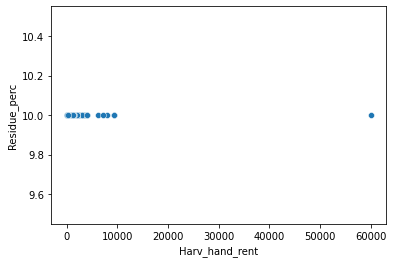

In [25]:
# train[["Residue_perc"]].isna().sum()
sns.scatterplot(data = train, x="Harv_hand_rent", y="Residue_perc")

In [31]:
items = set()
for index, value in train["LandPreparationMethod"].str.split().items():
    print(value)

['TractorPlough', 'FourWheelTracRotavator']
['WetTillagePuddling', 'TractorPlough', 'FourWheelTracRotavator']
['TractorPlough', 'FourWheelTracRotavator']
['TractorPlough', 'FourWheelTracRotavator']
['TractorPlough', 'WetTillagePuddling']
['TractorPlough']
['TractorPlough']
['FourWheelTracRotavator']
['TractorPlough']
['WetTillagePuddling']
['TractorPlough']
['TractorPlough']
['TractorPlough']
['TractorPlough', 'BullockPlough']
['TractorPlough', 'BullockPlough']
['TractorPlough', 'FourWheelTracRotavator']
['TractorPlough', 'FourWheelTracRotavator']
['FourWheelTracRotavator']
['TractorPlough']
['TractorPlough', 'FourWheelTracRotavator']
['WetTillagePuddling', 'TractorPlough', 'FourWheelTracRotavator']
['TractorPlough']
['TractorPlough']
['WetTillagePuddling', 'TractorPlough', 'FourWheelTracRotavator', 'BullockPlough']
['TractorPlough', 'FourWheelTracRotavator']
['TractorPlough', 'FourWheelTracRotavator']
['TractorPlough', 'FourWheelTracRotavator']
['WetTillagePuddling', 'TractorPlough', 

['FourWheelTracRotavator', 'TractorPlough']
['WetTillagePuddling', 'TractorPlough', 'FourWheelTracRotavator']
['TractorPlough', 'FourWheelTracRotavator']
['BullockPlough', 'TractorPlough']
['TractorPlough', 'FourWheelTracRotavator']
['WetTillagePuddling', 'TractorPlough', 'FourWheelTracRotavator']
['WetTillagePuddling', 'TractorPlough', 'FourWheelTracRotavator']
['TractorPlough']
['WetTillagePuddling', 'FourWheelTracRotavator']
['TractorPlough']
['TractorPlough']
['TractorPlough']
['WetTillagePuddling', 'TractorPlough', 'BullockPlough']
['TractorPlough']
['TractorPlough', 'FourWheelTracRotavator']
['TractorPlough']
['TractorPlough', 'FourWheelTracRotavator']
['TractorPlough', 'FourWheelTracRotavator']
['WetTillagePuddling', 'FourWheelTracRotavator']
['TractorPlough']
['WetTillagePuddling', 'FourWheelTracRotavator']
['TractorPlough', 'FourWheelTracRotavator']
['TractorPlough']
['TractorPlough']
['WetTillagePuddling', 'TractorPlough', 'FourWheelTracRotavator']
['WetTillagePuddling', 'Tra

['TractorPlough']
['TractorPlough', 'FourWheelTracRotavator']
['WetTillagePuddling', 'FourWheelTracRotavator', 'TractorPlough']
['WetTillagePuddling', 'FourWheelTracRotavator', 'TractorPlough']
['TractorPlough']
['TractorPlough', 'BullockPlough']
['WetTillagePuddling', 'FourWheelTracRotavator', 'BullockPlough', 'TractorPlough']
['WetTillagePuddling', 'TractorPlough']
['TractorPlough', 'WetTillagePuddling', 'FourWheelTracRotavator']
['TractorPlough', 'FourWheelTracRotavator']
['WetTillagePuddling', 'TractorPlough', 'BullockPlough']
['FourWheelTracRotavator']
['TractorPlough', 'WetTillagePuddling', 'FourWheelTracRotavator']
['TractorPlough', 'FourWheelTracRotavator']
['TractorPlough']
['TractorPlough']
['TractorPlough', 'FourWheelTracRotavator']
['TractorPlough', 'FourWheelTracRotavator']
['WetTillagePuddling', 'FourWheelTracRotavator']
['TractorPlough', 'FourWheelTracRotavator']
['TractorPlough', 'FourWheelTracRotavator']
['TractorPlough']
['TractorPlough', 'FourWheelTracRotavator']
['T

In [62]:
items = train["LandPreparationMethod"].str.split("\s+")

# for index, item in items.items():
#     print(items)
set(items.sum())

{'BullockPlough',
 'FourWheelTracRotavator',
 'Other',
 'TractorPlough',
 'WetTillagePuddling'}

In [59]:
items.apply(lambda x: "TractorPlough" in x) * 1

0       1
1       1
2       1
3       1
4       1
       ..
3865    1
3866    1
3867    1
3868    1
3869    1
Name: LandPreparationMethod, Length: 3870, dtype: int32

In [92]:
# pd.to_datetime(train["RcNursEstDate"]).dt.year.value_counts()
(pd.to_datetime(train["Threshing_date"]) - pd.to_datetime(train["Harv_date"])).dt.days

0        0
1       29
2       30
3       27
4        2
        ..
3865    15
3866    26
3867    10
3868    31
3869    42
Length: 3870, dtype: int64

In [95]:
100 - train["Residue_perc"]

Residue_perc
90    3642
60     228
Name: count, dtype: int64